In [23]:
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import numpy as np

In [49]:
rsds_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/rsds/gn/v20200615/rsds-pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'
rsus_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/rsus/gn/v20200615/rsus-pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'
rlds_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/rlds/gn/v20200615/rlds-pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'
rlus_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/rlus/gn/v20200615/rlus-pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'
hfss_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/hfss/gn/v20200615/hfss-pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'

In [50]:
rsds_cube = iris.load_cube(rsds_file, 'surface_downwelling_shortwave_flux_in_air')
rsus_cube = iris.load_cube(rsus_file, 'surface_upwelling_shortwave_flux_in_air')
rlds_cube = iris.load_cube(rlds_file, 'surface_downwelling_longwave_flux_in_air')
rlus_cube = iris.load_cube(rlus_file, 'surface_upwelling_longwave_flux_in_air')
hfss_cube = iris.load_cube(hfss_file, 'surface_upward_sensible_heat_flux')

In [26]:
rsds_cube.coord('precipitation minus evaporation region')

DimCoord(array([1, 2, 3, 4, 5, 6]), standard_name=None, units=Unit('1'), long_name='precipitation minus evaporation region', var_name='pereg', attributes={'flag_meanings': 'SH_precip SH_evap tropical_precip NH_evap NH_precip globe', 'flag_values': '1 2 3 4 5 6', 'invalid_standard_name': 'precipitation_minus_evporation_region'})

In [88]:
def plot_data(save=False):
    """Plot data"""
        
    fig = plt.figure(figsize=[18,8])
    ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
    ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
    ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
    ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
    ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
    
    axes = [ax1, ax2, ax3, ax4, ax5]
    plot_index_dict = {'SH precip': 0, 'SH evap': 3, 'tropical precip': 1,
                       'NH evap': 4, 'NH precip': 2}
    years = np.arange(1850, 2021, 1)
    
    for data_index, region_name in enumerate(['SH precip', 'SH evap', 'tropical precip', 'NH evap', 'NH precip']):
        plot_index = plot_index_dict[region_name]
        
        rsds_data = rsds_cube[:, data_index, -1].data
        rsus_data = rsus_cube[:, data_index, -1].data
        rnsds_data = rsds_data - rsus_data

        rlds_data = rlds_cube[:, data_index, -1].data
        rlus_data = rlus_cube[:, data_index, -1].data
        rnlds_data = rlds_data - rlus_data

        hfss_data = hfss_cube[:, data_index, -1].data

        ax = axes[plot_index]
        #ax.plot(years, rsds_data - rsds_data[0], label='downwelling shortwave', linestyle=':', color='tab:orange')
        #ax.plot(years, rsus_data - rsus_data[0], label='upwelling shortwave', linestyle='--', color='tab:orange')
        ax.plot(years, rnsds_data - rnsds_data[0], label='net downwelling shortwave', color='tab:orange')

        #ax.plot(years, rlds_data - rlds_data[0], label='downwelling longwave', linestyle=':', color='tab:blue')
        #ax.plot(years, rlus_data - rlus_data[0], label='upwelling longwave', linestyle='--', color='tab:blue')
        ax.plot(years, rnlds_data - rnlds_data[0], label='net downwelling longwave', color='tab:blue')

        ax.plot(years, hfss_data - hfss_data[0], label='upward sensible heat', color='tab:green')
        ax.set_title(region_name)
        ax.set_ylabel(rsds_cube.units)
        ax.set_xlabel('year')
        ax.set_ylim([-1e24, 1e24])
        
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    ax1.legend()
    plt.suptitle('ACCESS-ESM1-5, hist-GHG, r1i1p1f1')

    if save:
        outfile = '/g/data/r87/dbi599/temp/surface_energy_budget.png'
        plt.savefig(outfile, bbox_inches='tight', dpi=200)
        print(outfile)
    else:
        plt.show()
    plt.show()

/g/data/r87/dbi599/temp/surface_energy_budget.png


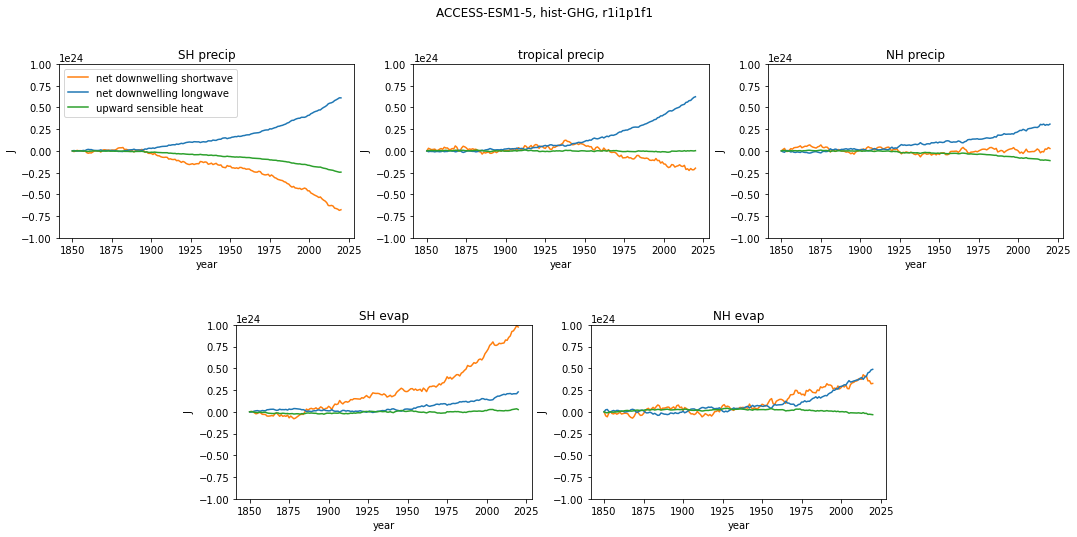

In [89]:
plot_data(save=True)